1/1 [==============================] - 0s 397ms/step
Image shape: (1, 128, 128, 3)
Predicted Class: Tomato___healthy
Confidence: 100.0%


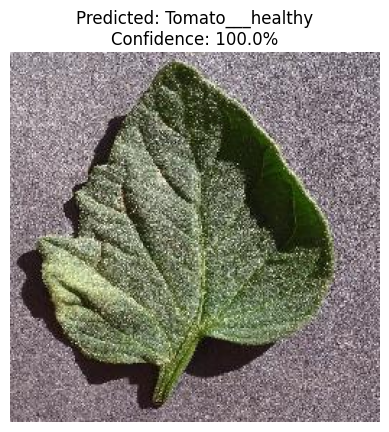

In [11]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Load the saved model
model = load_model('../hope.hdf5')

# Function to preprocess image (resize and rescale)
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(128, 128))  # Resize to the same size as used during training
    img_array = image.img_to_array(img)  # Convert the image to an array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Rescale the image (same as the training preprocessing)
    return img_array

# Function to predict image class
def predict_image(model, img_path, class_names):
    img_array = preprocess_image(img_path)  # Preprocess the image
    predictions = model.predict(img_array)  # Get the predictions
    predicted_class = class_names[np.argmax(predictions[0])]  # Get the class with highest probability
    confidence = round(100 * (np.max(predictions[0])), 2)  # Get the confidence
    print(f"Image shape: {img_array.shape}")
    return predicted_class, confidence

class_names = [
    'Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy',
    'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_',
    'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot',
    'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy',
    'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Strawberry___Leaf_scorch',
    'Strawberry___healthy', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus',
    'Tomato___healthy'
]

# Example usage:
img_path =  r"C:\\Tensor flow test\\Test\\T.JPG"  # Replace with the actual image path you want to predict
predicted_class, confidence = predict_image(model, img_path, class_names)

# Display the result
print(f"Predicted Class: {predicted_class}")
print(f"Confidence: {confidence}%")

# Display the image
img = image.load_img(img_path)
plt.imshow(img)
plt.title(f"Predicted: {predicted_class}\nConfidence: {confidence}%")
plt.axis("off")
plt.show()
